## Poverty Assessment: Pamplona Alta
### Caja del Amor Survey Results
### Sean O'Malley

#### Project

Every year, in partnership with the Solidaridad en Marcha, Catholic churches throughout the city of Lima, Peru deliver thousands of Christmas gift boxes to the poorest residents in the city. The campaign, called Caja Del Amor, has been in operation for years and has subsequently built long-term and well-sustained relationships with many community leaders in these areas. 


The list of gift recipients is built in coordination with the local community leaders, most of whom oversee around 150 families. These leaders choose the 5 to 10 families in most need of assistance in their respective community to receive the gift boxes.


These networks served as a point of strength when we began to explore the creation of an in-depth survey to better understand the poorest urban populations in Peru. However, our focus needed to also be on action-ability of insight and the concrete opportunity of enacting positive change in the lives those we surveyed. 


Therefore, we decided to focus on a region of high need, and an area where Solidaridad en Marcha had a significant footprint. This process of elimination lead us to the region of Pamplona Alta near the San Juan de Miraflores municipality of Lima.

#### Understand Pamplona Alta

Pamplona Alta is a shanty town riddled with extreme poverty, it has an absence of infrastructure, and a large portion of its community is without access to many basic human needs. The region has no public works, no paved roads, no public electricity, nor public access to water and sewage. If these services exist at all, they are provided by private companies at a premium price.


Water trucks provide the only (non-drinkable) water and they often cannot access many of the homes, especially in the upper portions of the region. Shallow latrines serve as a poor substitute for sewage and along with the pig farms, contribute to a high rate of parasitic infections, particularly among children.


The area was first populated in the 1990’s as a result of a decade of terrorism that affected the entire country of Peru. During that period, populations from the surrounding regions began a mass migration to the outskirts of Lima, leaving the lives they knew to find safety in the proximity of the city. Many only spoke Quechua, few had employment for years after arrival, and none of these new residents owned the land on the edge of Lima where they would now call home.

In the opinion of many close to the matter, it has predominantly been this issue of land ownership that has ensured the continued impoverishment of the people of Pamplona Alta. Why land ownership? Well, owning the land is necessary, according to the government of Peru, for those in Pamplona Alta to receive basic municipal services. In order to attain roads, plumbing, water, schools and many other basic human needs, they must first own the land on which their homes sit.

The land is rocky, mountainous and un-arable, yet to the people of Pamplona Alta, it is home. Inside of this difficult landscape, there are two prevailing realities: those who squatted on public land and those who squatted on private land.

The valleys of this mountainous region were owned predominantly by pig farmers upon arrival, and even today many families live side by side to pigs in the lower part of Pamplona Alta. The owners of the land have lacked the resources to forcibly evict their unwanted tenants since their arrival, yet these tenants have now called Pamplona Alta home for over 20 years and despite their best hopes, still, have a nearly impossible chance of owning the land on which their homes sit. As a result, many of these structures lack stewardship, the inability to own does not reasonably warrant investment and in turn, the homes exist in squalor.


The story of those in the upper mountain portions of Pamplona Alta is a different, yet only a slightly less dire narrative. For people who have built their homes on government-owned land, ownership is possible, however, only after a laundry list of nearly impossible requirements, given by the government of Peru, is achieved. Land ownership is possible to those who squatted on government land if they have: 

*	been there for longer than 5 years
*	access to water
*	access to electricity
*	safe access to home
*	community centers/parks within close proximity of their house


In practice, the government of Peru is asking the poorest and least advantaged people in their country to not only sustain life on a few dollars a day, but also build a road to create access for a privately priced water truck to get to their home, to pay to bring privately priced electricity to their home, to build community centers and to construct safe access to their homes from the bottom of the mountain. 

This task is absolutely impossible on their own, and organizations like Solidaridad en Marcha have helped make home ownership a reality to some of the people of Pamplona Alta, however, this battle is still uphill, and full of rocks and mud.

The subsequent reality for the people of Pamplona Alta is that their children are frequently sick, their jobs are too far away, their under-education is inevitable, many families are broken and the lack of government support ensures the existence of a dark economy, thus extending their lack of access to upward mobility. 

Deeper than these economic indicators of poverty, the people of Pamplona suffer from the poverty of dignity. Many members refer to themselves as “the forgotten ones,” election promises come and go without much change and through the confusing red tape and legalities, they still find themselves without access to basic human needs.

#### Data

Understanding the many facets of those in Pamplona Alta was integral in the way we built our survey, the questions we asked, and the way we asked them. We raised some questions that we heuristically had an intuitive idea of the answer, but needed to understand the severity. Yet, others we asked in order to gain insight into the tools we may have available to us within our solution set. 

Lastly, we inquired of economic indicators, religious factors and family structure. All intended to paint a picture of the lives of those in Pamplona Alta and to possibly determine causality between the various characteristics.  

We were able to fully survey over 500 families and after extracting all personably identifiable data, we built a dataset that held great potential for a greater understanding of the lives of those in Pamplona Alta and the possible routes available to help them.

The completed dataset built from the original survey contains 21 variables and 507 observations of which to explore, visualize and perform analysis on. The complete dataset can be found on my GitHub account, here. Also note, for binary variables, 1 is yes and 0 is no.

1.	__fam_n__	– _numeric factor_ – Unique identifier for each family.
2.	__internet__ – _binary_ – Does your phone have internet?
3.	__agua__ –	_binary_ – Can the water truck get to your house?
4.	__banco__ – _binary_ – Do you have a bank account?
5.	__iglesia__ – _binary_ – Do you go to church at least once a month?
6.	__dejar_hijos__ –  _binary_ – Do you leave your children home alone (when you go to work)?
7.	__cuantas_personas__ – _numeric_ – How many people live in your house?
8.	__tiempo_casa__ – _numeric_ – How long have you lived in your house?
9.	__primer_hijo__ – _numeric_ – At what age did you have your first child?
10.	__cuantas_trabajan__ – _numeric_ – How many people in your house work?
11.	__tiempo_trabajan__ – _numeric_ – How long does it take to get to your job?	
12.	__pierden_colegio__ – _numeric_ – How many days a month do your children miss school?
13.	__ingreso__ – _numeric_ – What is your monthly household income?
14.	__bautizadas__ – _numeric_ – How many people in your family are baptized?
15.	__direccion__ – _character factor_ – Name of neighborhood.
16.	__padre__ – _binary_ – Does the father of the children live in the home?
17.	__madre__ – _binary_ – Does the mother of the children live in the home?
18.	__F__ – _numeric_ – Count of females in the home.
19.	__M__ – _numeric_ – Count of males in the home.
20.	__niños__ – _numeric_ – Count of children 18 and younger in the home.
21.	__mayores__ – _numeric_ – Count of adults 65 and older in the home.

Months of conversations, meetings, reading and collaboration with community members came into building this survey. Qualitative analysis helped us produce a dataset that has the potential to perform multiple quantitative analyses that are relevant and informed; and it is from this point that we will now follow the flow of a data science analysis. 

#### Process

Reminder: I will at times use technical language, but I encourage you to keep reading through, because I will also accompany every scientific insight with an explanation in simple language, relevant to the question at hand.

We will begin by exploring the variables, the average values and basic correlations, visualizing how characteristics behave with one another. Following our exploratory phase, we will inspect cause and effect relationships between pairs of variables, as well as predict specific variables using all available data. I will use multiple techniques to perform this analysis of causality in hopes of providing variable importance in the prediction of key factors of the poor. The result will be a set of priorities for aid workers to pursue in the betterment of certain economic or societal indicators.


The succeeding analysis will be that of understanding natural segments that exist within the poorest of the poor. Again, using multiple techniques, I will attempt to determine the groups of people that exist within those surveyed. What commonalities do certain segments have? How can we target aid campaigns to help certain groups? These are a few of the many questions a segmentation analysis will help us answer.

Our quantitative and qualitative analyses will come to fruition in the final recommendation portion of this process. We will present questions and provide actionable insight into those questions, as determined by our analysis. We will build a road map for aid, a list of how we can help, who we can help and the logistical suggestions to do so. Our intent is to tie every insight to action and offer suggestions as to the best action available given what we have learned from the analysis. So, let’s get started!

Import the necessary packages

In [9]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

Ingest the raw data from its github location

In [10]:
github_file_location = "https://raw.githubusercontent.com/showmalley/SeanOMalleyCodePortfolio/master/Development%20Economics/PovertySurveys/CDA_FULL_2018.csv"

df = pd.read_csv(github_file_location, encoding="ISO-8859-1").iloc[:,1:]

We need to explore the datatypes to unsure correct formatting. It looks like we only need to alter the FAM_N and DIRECCION variables to be categorical. 

In [11]:
df.FAM_N = df.FAM_N.astype('category')
df.DIRECCION = df.DIRECCION.astype('category')
print(df.dtypes)

FAM_N               category
internet             float64
agua                 float64
banco                float64
iglesia              float64
dejar_hijos          float64
cuantas_personas       int64
tiempo_casa          float64
primer_hijo          float64
cuantas_trabajan     float64
tiempo_trabajan      float64
pierden_colegio      float64
ingreso              float64
bautizadas           float64
DIRECCION           category
PADRE                float64
MADRE                float64
F                    float64
M                    float64
NINOS                float64
MAYORES              float64
dtype: object


All looks well, lets move on to explore the data itself. First with summary statistics. 

In [12]:
df.describe()

,internet,agua,banco,iglesia,dejar_hijos,cuantas_personas,tiempo_casa,primer_hijo,cuantas_trabajan,tiempo_trabajan,pierden_colegio,ingreso,bautizadas,PADRE,MADRE,F,M,NINOS,MAYORES
count,498.000000,493.000000,503.000000,500.000000,486.000000,505.000000,495.000000,476.000000,479.000000,409.000000,344.000000,441.000000,440.000000,502.000000,502.000000,499.000000,499.000000,499.000000,499.000000
mean,0.106426,0.705882,0.035785,0.874000,0.403292,5.043564,14.225859,20.918067,1.281837,1.171883,1.962791,682.380952,2.650000,0.551793,0.970120,2.543086,2.036072,2.603206,0.058116
std,0.308692,0.456108,0.185939,0.332182,0.491064,1.958418,8.601098,4.806532,0.763925,0.690369,2.318429,576.150332,1.838651,0.497806,0.170427,1.240080,1.270100,1.521885,0.258644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000,18.000000,1.000000,0.600000,0.000000,430.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,15.000000,20.000000,1.000000,1.000000,2.000000,700.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,6.000000,18.000000,23.000000,1.000000,2.000000,3.000000,850.000000,4.000000,1.000000,1.000000,3.000000,3.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,50.000000,45.000000,7.000000,3.000000,22.000000,8500.000000,10.000000,1.000000,1.000000,8.000000,6.000000,8.000000,2.000000


Looking above, we have a few checks we need to take care of. Look to min and max to identify unreasonable outliers. Once this is controlled for, looking at the mean values can give us our first brief insight into the lives of the data we have ingested

__Outliers__

The only data changes I see that need changed is the age of the first child and people living in each house. 
* We know no one at age 0 can have a child, so lets control for this by saying any value under 11 is NaN. 
* Also, 0 people cannot live in a household, so where the value is 0, lets impute 1
* Additionally, there are two observations that are upwards of 5 standard deviations above the next highest income result, this is presumably a typo or someone that absolutely does not apply to this population sample, so I have made the choice to remove it.

In [13]:
df.loc[df.primer_hijo < 12, 'primer_hijo'] = np.nan
df.loc[df.cuantas_personas < 1, 'primer_hijo'] = 1
df = df[(df['ingreso'] < 3000)]

In [14]:
df.describe()

,internet,agua,banco,iglesia,dejar_hijos,cuantas_personas,tiempo_casa,primer_hijo,cuantas_trabajan,tiempo_trabajan,pierden_colegio,ingreso,bautizadas,PADRE,MADRE,F,M,NINOS,MAYORES
count,434.000000,430.000000,437.000000,434.000000,423.000000,439.000000,434.000000,417.000000,433.000000,384.000000,313.000000,439.000000,396.000000,436.000000,436.000000,434.000000,434.000000,434.000000,434.000000
mean,0.110599,0.700000,0.038902,0.887097,0.425532,5.109339,14.098618,21.105516,1.295612,1.164844,1.940895,649.043280,2.585859,0.548165,0.965596,2.589862,2.023041,2.633641,0.052995
std,0.313997,0.458791,0.193582,0.316840,0.495009,1.986686,8.730716,4.750343,0.779009,0.688559,2.393338,294.448824,1.836398,0.498246,0.182473,1.246700,1.258477,1.539885,0.234354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000,18.000000,1.000000,0.600000,0.000000,425.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,15.000000,20.000000,1.000000,1.000000,2.000000,680.000000,2.000000,1.000000,1.000000,2.500000,2.000000,3.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,6.000000,18.000000,23.000000,1.000000,1.562500,3.000000,850.000000,4.000000,1.000000,1.000000,3.000000,3.000000,4.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,50.000000,45.000000,7.000000,3.000000,22.000000,2080.000000,10.000000,1.000000,1.000000,8.000000,6.000000,8.000000,2.000000


Now looking to the binary values, lets get the proportion of YES to NO answers.

In [15]:
binaries = ['internet','agua','banco','iglesia','dejar_hijos','PADRE','MADRE']

for i in range(len(binaries)):
    print('---')
    print(str(round(df[binaries[i]].mean()*100,2)) + "% of those surveyed answered YES to " + str(binaries[i]))
    
print('---')

---
11.06% of those surveyed answered YES to internet
---
70.0% of those surveyed answered YES to agua
---
3.89% of those surveyed answered YES to banco
---
88.71% of those surveyed answered YES to iglesia
---
42.55% of those surveyed answered YES to dejar_hijos
---
54.82% of those surveyed answered YES to PADRE
---
96.56% of those surveyed answered YES to MADRE
---


In [17]:
# df.loc[:,binaries]

# Data
#r = [0,1,2,3,4]
#raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
#df = pd.DataFrame(raw_data)
 
# From raw value to percentage
#totals = [i+j+k for i,j,k in zip(df.iloc[:,binaries])]
#greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
#orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
#blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
#barWidth = 0.85
#names = tuple(binaries)
# Create green Bars
#plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
#plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
#plt.xticks(r, names)
#plt.xlabel("group")
 
# Show graphic
#plt.show()


We can see that a small proportion of those surveyed had bank accounts and internet access, while a large proportion went to church regularly and a majority had access to drinkable water though not overwhelmingly so. In terms of family dynamics, we see that only half of fathers are present in the home and most homes have a mother present. 

The initial pulse we get from the binary proportional averages is that we can affirm some of our pre-conceived ideas surrounding broken families and presence of a dark economy implying sparse routes to traditional credit sources. 

Next, let's take a look at the average values of our numeric survey variables.

In [18]:
numerics = ['cuantas_personas','tiempo_casa','primer_hijo','cuantas_trabajan','tiempo_trabajan','pierden_colegio','ingreso','bautizadas', 'F','M','NINOS','MAYORES']

for i in range(len(numerics)):
    print('---')
    print("The average value for " + str(numerics[i]) + " is " + str(round(df[numerics[i]].mean(),2)))
    
print('---')

---
The average value for cuantas_personas is 5.11
---
The average value for tiempo_casa is 14.1
---
The average value for primer_hijo is 21.11
---
The average value for cuantas_trabajan is 1.3
---
The average value for tiempo_trabajan is 1.16
---
The average value for pierden_colegio is 1.94
---
The average value for ingreso is 649.04
---
The average value for bautizadas is 2.59
---
The average value for F is 2.59
---
The average value for M is 2.02
---
The average value for NINOS is 2.63
---
The average value for MAYORES is 0.05
---


Inspecting the numeric means of our survey results, we can begin to get a sense of the lives lead by the poorest of the poor in Pamplona Alta. We see that the average age of the first child is 21, which is young by developed world standards, but not nearly as young as our qualitative guess would have assumed; thus looking into the distribution of this variable could provide further insight.

We see that the average time in the home is nearly triple the required 5 year requirement of the government for ownership, which is one good step forward. However, we also see that the average household of 5 is usually living off of the salary of a single person, and that average value is only 682 soles a month ($6.60 USD a day). 

Looking to the religious aspects of the survey, it is also interesting to note that on average only 2/5 members of households are baptized though a majority attend church services regularly.

Now, we do not want to make any extraneous assumptions from these averages, nevertheless, these initial figures have allowed us to paint a faint picture of the lives lead by those surveyed.

#### Distributions

Average values can give us a glimpse into the character of a variable, however, the distribution can tell us even more. Given the above results I wanted to take the time to look into certain variables of intrigue. This process gives shape to the values within, as well as helps us spot outliers that may have significantly affected our larger groups at whole. 

Given the average values of these two _Time in Home_ and _Age of First Child_ I was curious as to the distribution of those variables. 

In [19]:
sns.set_style('darkgrid')
sns.set(color_codes = True)

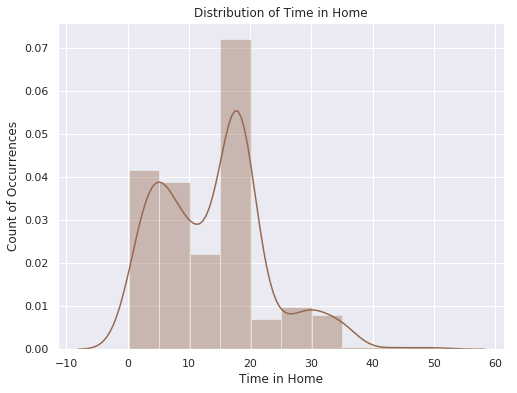

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.tiempo_casa[df['tiempo_casa'].isna() == False],ax=ax, color = '#97694F', bins = 10)
ax.set(xlabel = "Time in Home",ylabel = "Count of Occurrences", title = "Distribution of Time in Home")
plt.show()

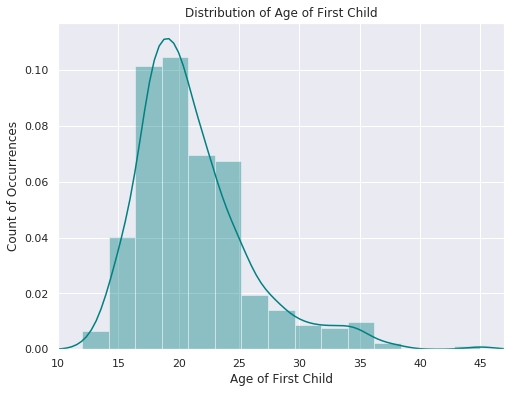

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.primer_hijo[df['primer_hijo'].isna() == False],ax=ax, color = 'teal', bins = 20)
ax.set(xlabel = "Age of First Child", xlim=(10,47), ylabel = "Count of Occurrences", 
       title = "Distribution of Age of First Child")
plt.show()

The third distribution is household size, the values are, more or less, normally distributed, with a majority of the households being between 4 and 6 people per household. We can see that there are some houses with as many as 15, but that number is small enough that those outliers should hold little weight to our predictive modeling further on.

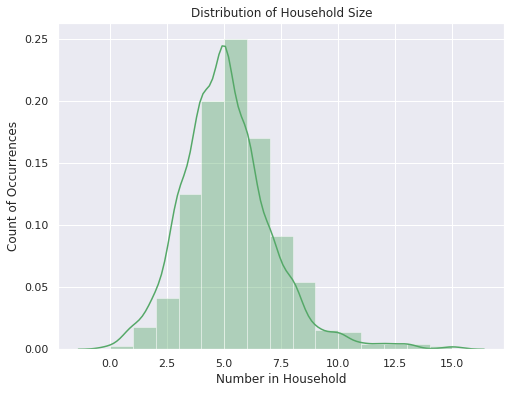

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['cuantas_personas'],ax=ax, color = 'g', bins = 15)
ax.set(xlabel = "Number in Household",ylabel = "Count of Occurrences", title = "Distribution of Household Size")
plt.show()

Next, looking to commute time, we see a mostly bi-modal distribution, with a majority of people traveling just over an hour to work, and another traveling over two hours to work. This confirms the difficulty we’ve seen for people in Pamplona Alta to find employment near to home.

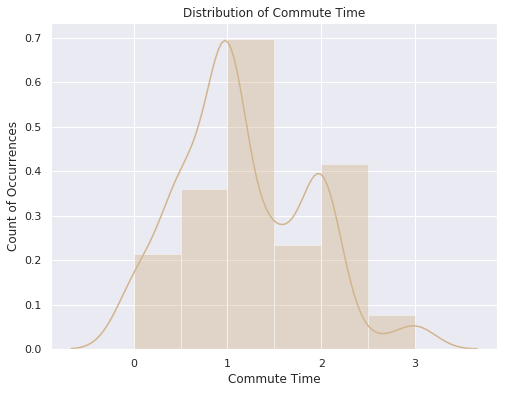

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.tiempo_trabajan[df['tiempo_trabajan'].isna() == False],ax=ax, color = 'tan', bins = 6)
ax.set(xlabel = "Commute Time",ylabel = "Count of Occurrences", title = "Distribution of Commute Time")
plt.show()

Lastly, we see the distribution of household income below, and something feels a little off. We see that there are two significant outliers of income to the group at large. This suggests that our average value of income has been significantly pulled upward by these two observations. Moving forward, we will have to proceed with caution as we attempt to measure the reality of the large majority of those in Pamplona Alta, and not allow outliers to affect our understanding of the community at large.

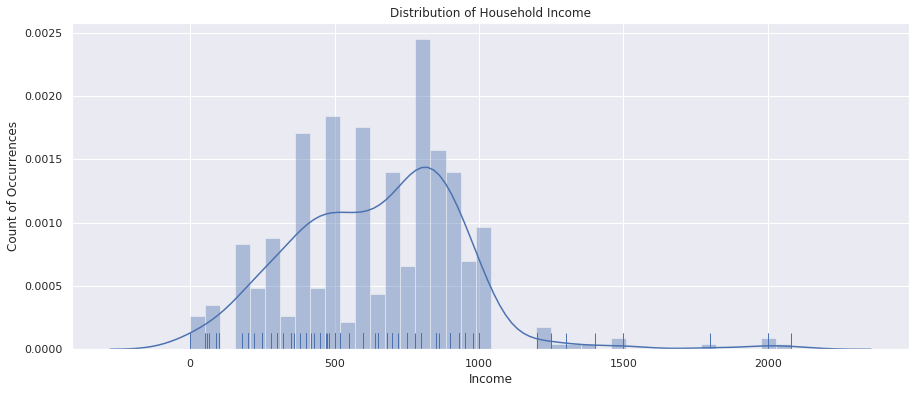

In [24]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot(df.ingreso[(df['ingreso'].isna() == False)],ax=ax, color = 'b', rug = True, bins = 40)
ax.set(xlabel = "Income",ylabel = "Count of Occurrences", title = "Distribution of Household Income")
plt.show()

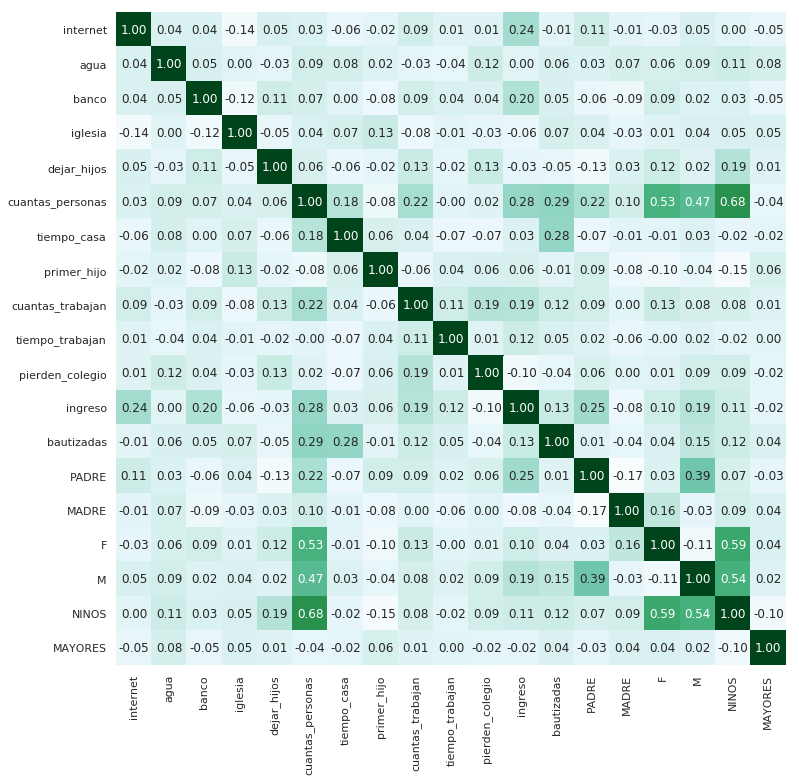

In [25]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), cbar=False, cmap="BuGn",annot=True, fmt=".2f")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The plot above is discouraging, we are seeing largely weak correlations between variables, meaning that the predictive power of models ahead could be difficult to come by. Nevertheless, we see stronger correlations between factors like income and internet, number of workers and leaving kids at home, as well as fathers in home and household size.

Due to the correlation matrix not giving us solid results, we will have to keep in mind the stronger positive / negative correlations and move forward with more analysis.

In [36]:
# simple regressions
    # father in home on income
    # internet and income
    # water and missing school
    # workers and leaving kids
    # bank and how many people work

In [15]:
# pairplot, jointgrid and factorplot of interesting points

In [ ]:
# outliers, applying logs
    # https://www.kdnuggets.com/2018/08/make-machine-learning-models-robust-outliers.html

In [16]:
# multiple regressions (linear & polynomial)

In [17]:
# decision tree

In [18]:
# random forest

In [19]:
# variable importance

In [20]:
# ensemble modeling

In [21]:
# root cause analysis

In [22]:
# hierarchical cluster analysis

In [23]:
# k-means cluster analysis

In [24]:
# putting it all together
    # visualizations
    # important factors and indicators
    # groups
    # priority associated to neighborhoods
    # master dataset
    # conclusion, way forward